^^ Turn on the button to see and toggle the Code. Turned off by default to improve readability

In [1]:
import pandas as pd 
import plotly.offline as py 
import plotly.graph_objs as go
import numpy as np
import cufflinks as cf
cf.go_offline()
py.init_notebook_mode(connected=True)


# KPMG Boston Housing Data Analysis
<br>
<br>




The following table is just a peek of what our dataset looks like. <br>Lets also create a 2nd table to show us some information like quartiles and mean of our data.  

In [4]:
data = pd.read_csv('Boston Housing.csv')
data[:5]

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [5]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             MEDV  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

### House Price Distribution 
<br>Let's take a closer look at the feature we are most concerned about: 

In [109]:
fig = ff.create_distplot([data.MEDV],['MEDV'],bin_size=[.9])
fig.update({'layout':{'title':'Density Distribution of Median House Prices in 1000s'}})
py.iplot(fig)

The figure above shows the distribution of the MEDV parameter, it looks normally distributed with some outliers on the right side. Makes sense that there is more volume of lower priced housing and more sparse and variable prices above the median. 

### Pearson Correlation Matrix
A quick Pearson Correlation Matrix will tell us which variables are likely to be correlated to one another. If we focus on darker correlated variables in the MEDV column, it could give us a good idea on what likely drives price.

In [136]:
z= data.corr().iplot(kind='heatmap',colorscale= 'Oranges', title='Pearson Correlation Matrix of Variables')

Based on this matrix, some variables to look more closely at is definitely RM,followed by DIS,CHAS and ZN. Also interestingly there is a strong negative correlation with MEDV and LSTAT(-0.74).But the numbers may ne misleading(as we'll see later that LSTAT is a nonlinear relationship). A visual interpretation will show this better.

This Dataset contains a lot of information/features. <br>A simple way to see which ones are important would be to use a pair-wise scatterplot matrix

### Pair-Wise Matrix of Scatter Plots
We use this to detect any correlations or associations between variables. Of course we will be keeping our focus on the 'Medium Value of owner homes'(medv) feature as our client would like to know the factors that drive home price. 

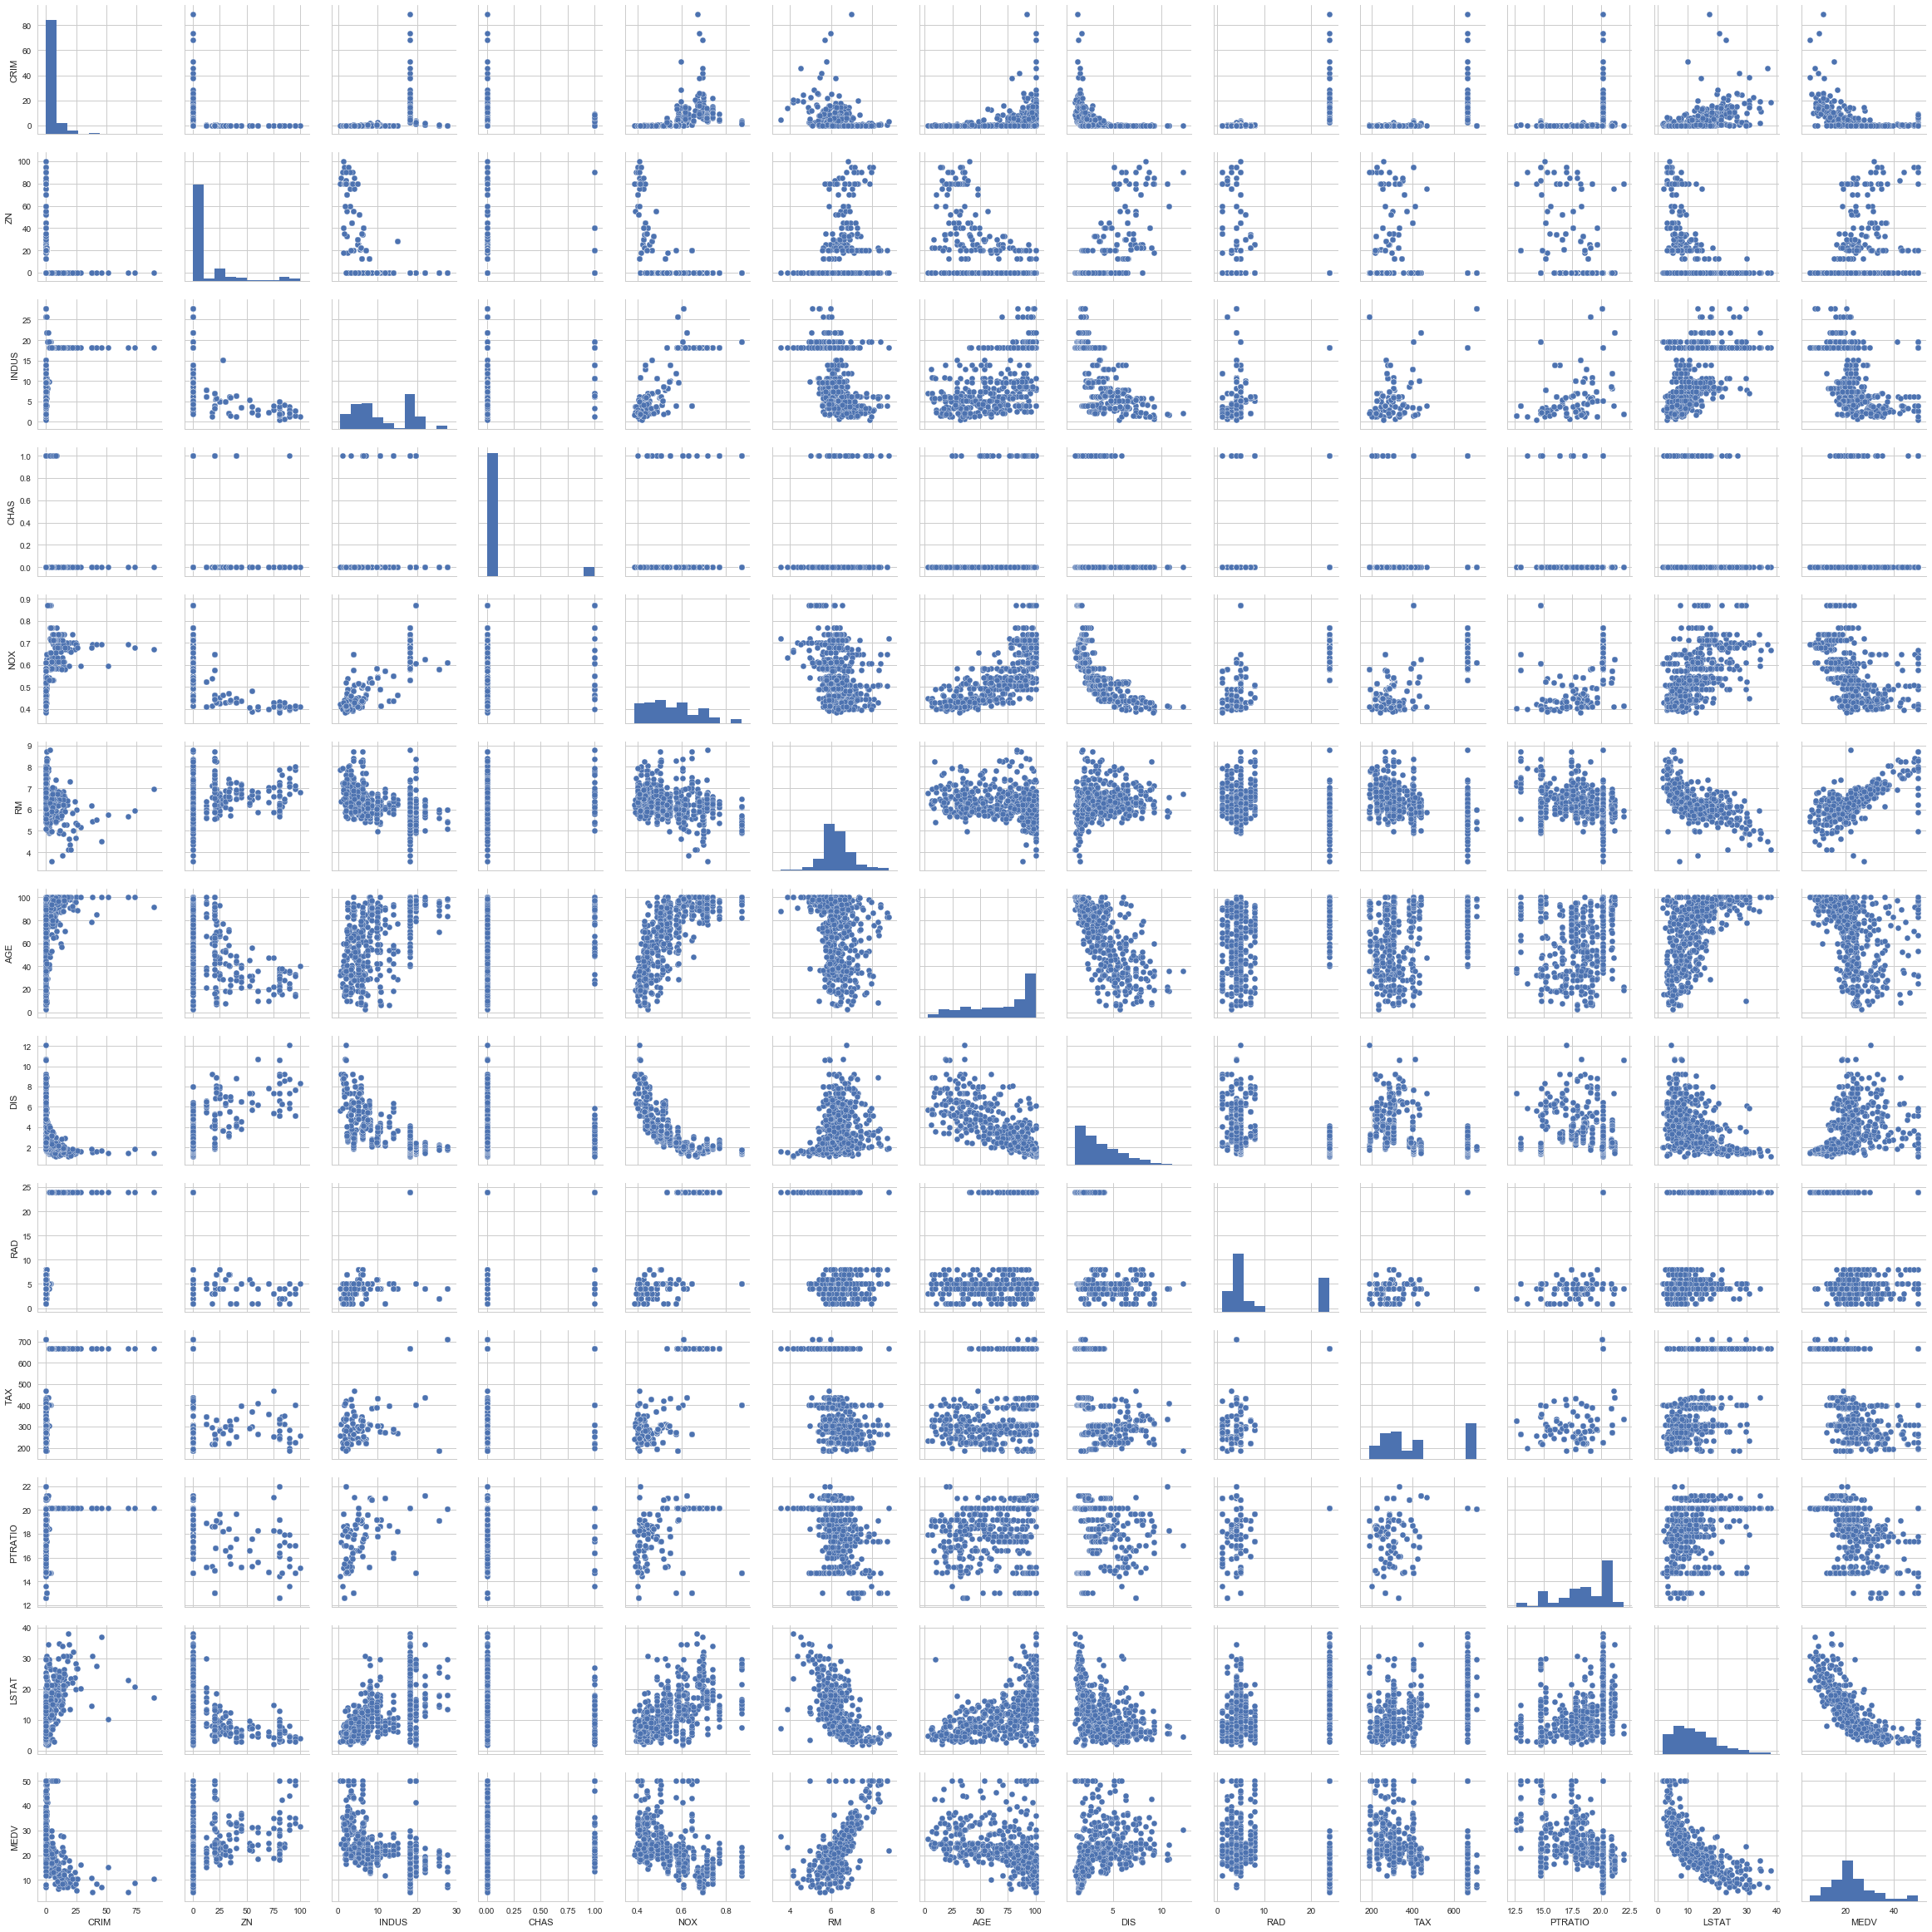

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pair-wise scatter-plot of all the attributes:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(data.dropna())
plt.show()

**If we focus on the MEDV** column. We can easily see which variables appear to have some sort of correlation. I'll take some variables that have some interesting correlations and take a closer look..<br><br>
#### Zooming in 

In [146]:
import plotly.figure_factory as ff
fig = ff.create_scatterplotmatrix(data[['RM', 'MEDV','LSTAT']], height=800,width=800)
fig.update({'layout':{'title':'Matrix of Scatter Plots<br> of most important attributes'}})
py.iplot(fig)

Here it is very interesting to see what is positively/negatively correlated correlated. The clearest association is between the number of rooms and the positive increase in median value(price). It also interesting to examine the association in LSTAT and MEDV. It seems as though the higher percentage of lower status population in the area, the median house value also tends to go down. 

### Modeling

<br>The best thing for us to do now, is to fit the data through a Machine Learning Model (Linear Regression seems to be the simplest yet effective to forecast possible house price data). We will have to split the dataset we have into and training set and test set(split 3:7), in order to train our model with one set, and validate the accuracy of our model in the test set. 

In [233]:
X = data[[ 'RM']]
y = data['MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
mse = np.mean((lm.predict(X_test) - y_test)**2)
y_pred = lm.predict(X_test)

Y-Intercept, Slope

In [234]:
print(lm.intercept_, lm.coef_[0])

-32.59974232819911 8.765722308113425


In [291]:
t1 = go.Scatter(x= y_test, 
                y= y_pred, 
                mode='markers',
                marker=dict(color='black')
               )

t2 = go.Scatter(x= X_test.index.values.tolist(), 
                y= y_test.index.values.tolist(),
                mode='lines',
                line=dict(color='blue', width=3)
                )

layout = go.Layout(title='Predicted: Price vs. number of rooms',xaxis=dict(range=[0,50],ticks='', showticklabels=False,
                              zeroline=False,title='Average number of rooms [RM]'),
                   yaxis=dict(range=[0,45], ticks='', showticklabels=False,
                              zeroline=False,title = 'Price in $1000s [MEDV] '),
                   showlegend=False, hovermode='closest')

fig = go.Figure(data=[t1,t2], layout=layout)

py.iplot(fig)

We can now take a look at how our different variables affect the median house values variables. 

In [292]:
# def lin_regplot(X, y, model):
#     plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
#     plt.plot(X, model.predict(X), color='black', lw=2)
#     return None

# lin_regplot(X_test, y_test, lm)
# plt.xlabel('Average number of rooms [RM] (standardized)')
# plt.ylabel('Price in $1000s [MEDV] (standardized)')
# plt.show()


In [164]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
RM     9.830922

By this chart, the most signficant numbers to pay attention to are the nitric oxide increasezs (NOX) and # of rooms(RM). For every unit increase of NOX there is a 1700 decrease in median house price, and for every unit increase in the room variable ~6,400 increase in the value of a house. 

In [248]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.287787518542652
MSE: 46.09244198682004
RMSE: 6.789141476418063
